# **MACHINE LEARNING**

##Tugas Praktikum 11 - Convolutional Neural Network (CNN)


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



# **TUGAS**

1.  Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

2. Buatlah model CNN untuk klasifikasi dataset MNIST.









---


# **1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**


---



# **Import Library**

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# **Memuat Dataset CIFAR-10**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


# **Normalisasi Data**

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Split Data Training dan Testing**

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)**

In [6]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

**Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data**

In [7]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

**Langkah 7: Membuat model dan mengompilasi**

In [8]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

**Langkah 8: Melatih model dengan ImageDataGenerator**

In [9]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 51s 59ms/step - loss: 2.2370 - accuracy: 0.1544 - val_loss: 1.8347 - val_accuracy: 0.3036
Epoch 2/50
625/625 [==============================] - 36s 58ms/step - loss: 1.8163 - accuracy: 0.3196 - val_loss: 1.7203 - val_accuracy: 0.3780
Epoch 3/50
625/625 [==============================] - 35s 55ms/step - loss: 1.5991 - accuracy: 0.4142 - val_loss: 1.3846 - val_accuracy: 0.4936
Epoch 4/50
625/625 [==============================] - 36s 57ms/step - loss: 1.4599 - accuracy: 0.4865 - val_loss: 1.2126 - val_accuracy: 0.5576
Epoch 5/50
625/625 [==============================] - 34s 55ms/step - loss: 1.3579 - accuracy: 0.5293 - val_loss: 1.2483 - val_accuracy: 0.5645
Epoch 6/50
625/625 [==============================] - 34s 55ms/step - loss: 1.2757 - accuracy: 0.5634 - val_loss: 1.1444 - val_accuracy: 0.6108
Epoch 7/50
625/625 [==============================] - 34s 54ms/step - loss: 1.2219 - accuracy: 0.5860 - val_loss: 1.0054 - val_accuracy:

**Langkah 9: Mengevaluasi model pada set tes**

In [10]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6813 - accuracy: 0.8178


**Langkah 10: Melakukan prediksi**

<Axes: >

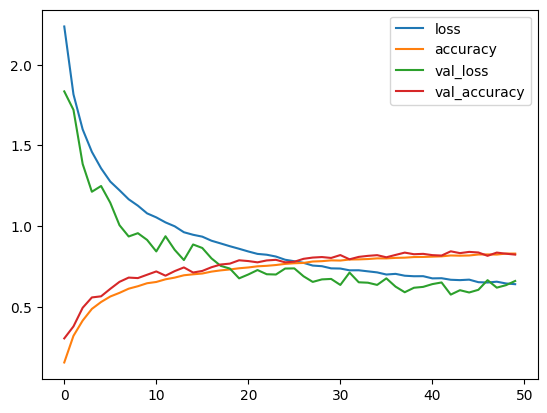

In [11]:
pd.DataFrame(history.history).plot()

**Langkah 11: Tampilkan laporan klasifikasi**

In [12]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1000
           1       0.92      0.93      0.93      1000
           2       0.80      0.72      0.76      1000
           3       0.81      0.50      0.62      1000
           4       0.71      0.84      0.77      1000
           5       0.79      0.73      0.76      1000
           6       0.70      0.96      0.81      1000
           7       0.86      0.89      0.87      1000
           8       0.90      0.91      0.91      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



**Langkah 12: Menampilkan visualisasi hasil prediksi**

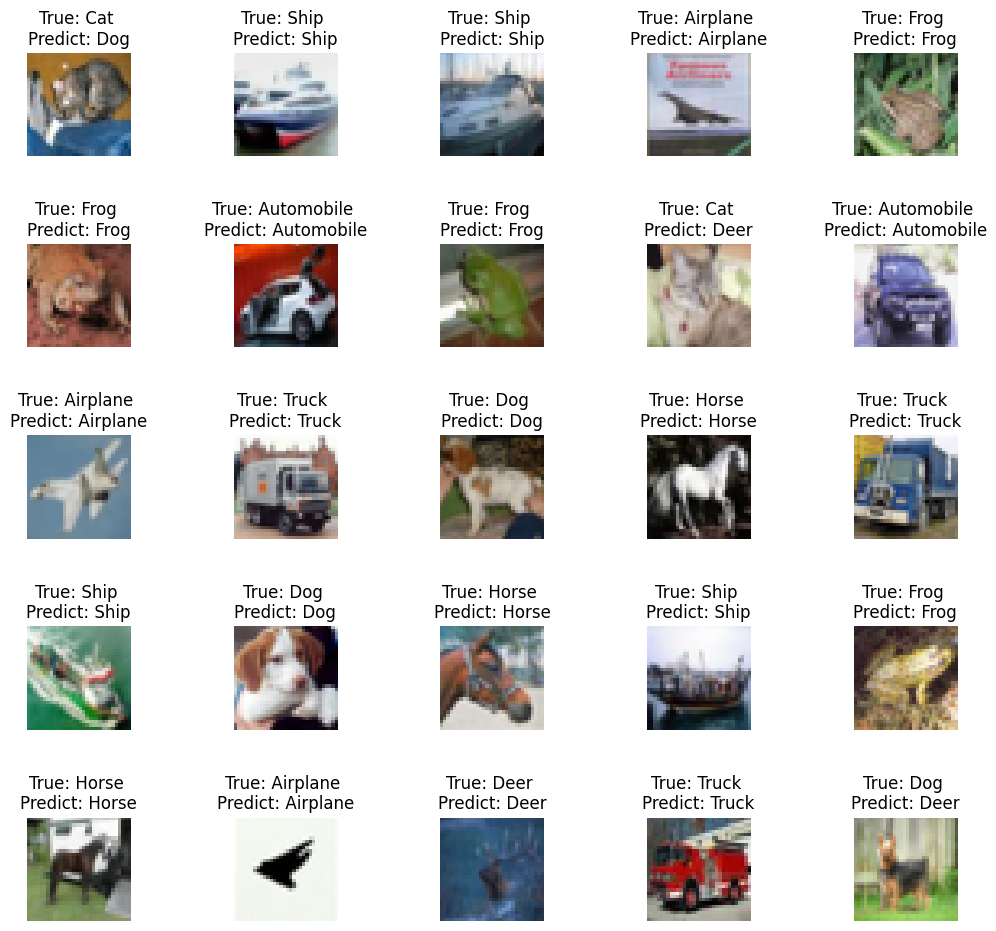

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)